In [1]:
import pandas as pd
import sqlite3 as sql

In [2]:
db = sql.connect('master.db')
cursor = db.cursor()  


check = f"SELECT * FROM TRANSACTIONS;"
TRANSACTIONS = pd.read_sql_query(check,db)

In [4]:
TRANSACTIONS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   trans_id    85 non-null     object
 1   user_id     85 non-null     object
 2   product     85 non-null     object
 3   amount      85 non-null     int64 
 4   trans_date  85 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.4+ KB


<Axes: title={'center': 'TOP CUTOMERS'}, xlabel='user_id'>

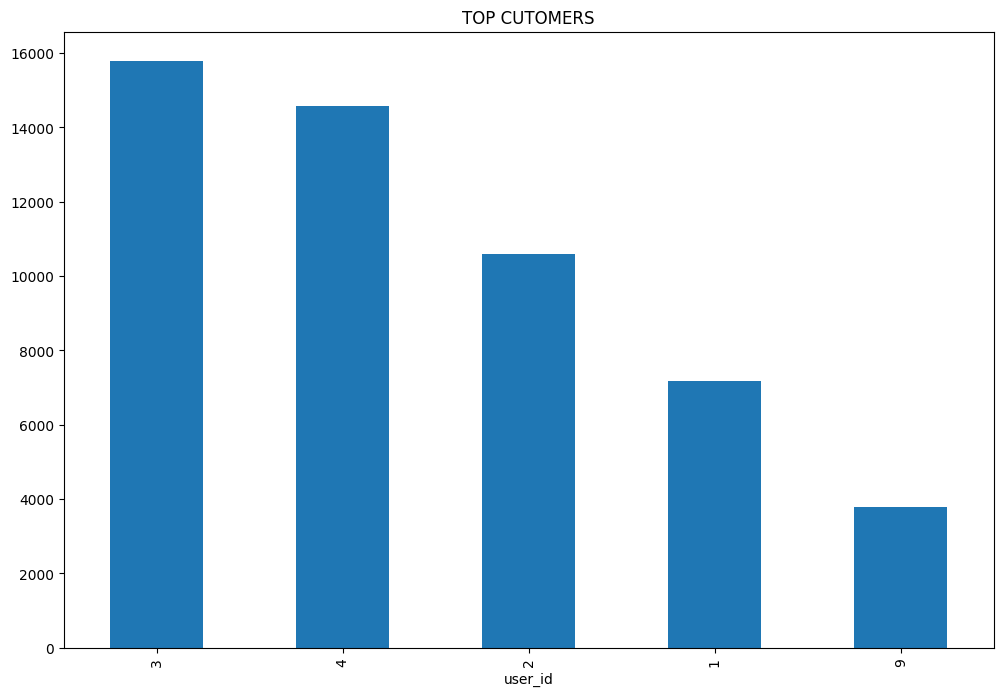

In [35]:
TOP_CUSTOMERS = TRANSACTIONS[['user_id','amount']].groupby('user_id').agg({'amount':'sum'}).sort_values(by='amount', ascending=False).head().reset_index()

TOP_CUSTOMERS.set_index('user_id')['amount'].plot(kind='bar', title='TOP CUTOMERS', figsize=(12, 8))

<Axes: title={'center': 'TOP CUSTOMERS SPENDING PATTERNS '}, xlabel='user_id'>

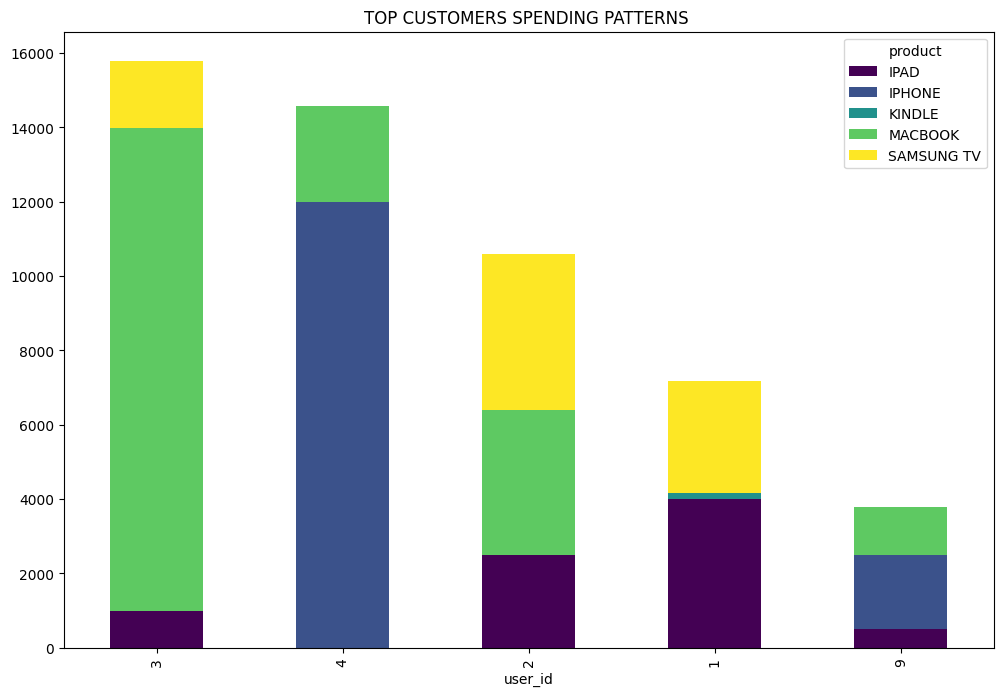

In [37]:
SPENDING_PATTERNS = TRANSACTIONS[['user_id','product','amount']].groupby(['user_id','product']).agg({'amount':'sum'}).sort_values(by=['user_id','amount']).reset_index()

SPENDING_PATTERNS = SPENDING_PATTERNS[SPENDING_PATTERNS['user_id'].isin(TOP_CUSTOMERS['user_id'])]

pivot_df = SPENDING_PATTERNS.pivot(index='user_id', columns='product', values='amount').fillna(0)

pivot_df = pivot_df.sort_index(axis=1)


pivot_df['Total'] = pivot_df.sum(axis=1)


pivot_df = pivot_df.sort_values(by='Total', ascending=False)

pivot_df = pivot_df.drop(columns='Total')

pivot_df.plot(kind='bar',title='TOP CUSTOMERS SPENDING PATTERNS ', stacked=True, figsize=(12, 8), colormap='viridis')

